# Testing out fastai

In [1]:
from fastai.vision.all import *

In [2]:
path = '../cv_data/cifar10/train'

In [3]:
files = get_image_files(path)
len(files)

50000

In [4]:
type(files)

fastcore.foundation.L

In [5]:
# Dataloading take 2
cifar10 = '../cv_data/cifar10'

In [6]:
dls = ImageDataLoaders.from_folder(cifar10)

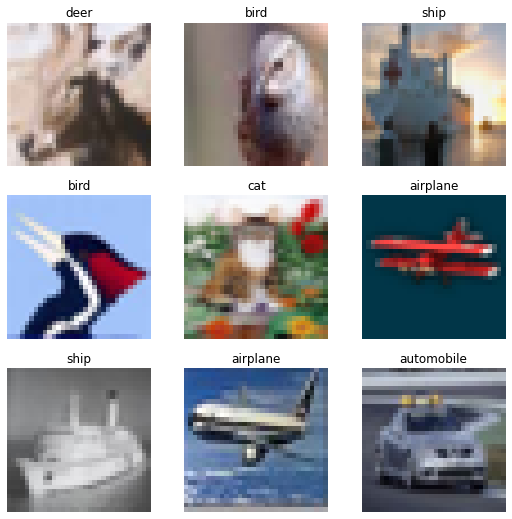

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
#learn.fine_tune(1)

## Add Transforms

In [9]:
from train_classification_lightning import choose_dataset

In [10]:
mean, std, traindir, valdir, num_c = choose_dataset('cifar10')

In [11]:
#cifar_stats = ([*mean],[*std])

In [12]:
#import torchvision.transforms as transforms
#data_transform_normal = transforms.Compose([
#            transforms.Resize((300,300)),
#            #transforms.CenterCrop((100, 100)),
#            transforms.RandomCrop((250, 250), padding=4),
#            transforms.RandomHorizontalFlip(p=0.5),
#            #transforms.RandomRotation(degrees=(-90, 90)),
#            #transforms.RandomVerticalFlip(p=0.5),
#            transforms.ToTensor(),
#            transforms.Normalize(mean, std)
#            ])

In [13]:
item_tfms = [ToTensor, RandomResizedCrop(128, min_scale=0.35)]

In [14]:
item_tfms2 = [ToTensor, Resize(size=(300,300)), 
              RandomCrop(size=(250,250))#, 
              #Dihedral()
             ]

In [22]:
batch_tfms = [Dihedral()]
#batch_tfms = [Dihedral(),Normalize()]


In [25]:
dls = ImageDataLoaders.from_folder(cifar10, train='train', 
                                   valid='test', device=1, 
                                   item_tfms=item_tfms2,
                                  batch_tfms=batch_tfms,
                                  bs=164)

In [28]:
dls.train_ds.items[5:10]

[Path('../cv_data/cifar10/train/bird/20189_bird.png'),
 Path('../cv_data/cifar10/train/bird/31230_bird.png'),
 Path('../cv_data/cifar10/train/bird/13226_bird.png'),
 Path('../cv_data/cifar10/train/bird/8314_bird.png'),
 Path('../cv_data/cifar10/train/bird/12191_bird.png')]

In [38]:
type(dls)

fastai.data.core.DataLoaders

In [26]:
learn = cnn_learner(dls, resnet18, pretrained=False, 
                    metrics=[accuracy, top_k_accuracy])
#learn.fine_tune(1)

In [27]:
learn.fit(n_epoch=50)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.835039,1.938373,0.367400,0.868000,01:42
1,1.513667,1.272368,0.544600,0.944800,01:53
2,1.243599,1.508175,0.606100,0.953300,01:57
3,1.053734,1.016378,0.705100,0.976600,02:06
4,0.938526,0.732988,0.744500,0.981900,02:08
5,0.849213,0.642656,0.776800,0.985100,02:02
6,0.765467,0.584992,0.800100,0.989000,02:07
7,0.720816,0.608127,0.780000,0.991400,02:09
8,0.659474,0.523544,0.815900,0.990400,02:07
9,0.634465,0.528767,0.816700,0.991600,02:01
